#import Libraries

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')

In [3]:
data_1 = pd.read_csv('train.csv')

In [4]:
data_1.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [5]:
test=pd.read_csv('test_G.csv')

In [6]:
data_2 = pd.read_csv('test_G.csv')

In [7]:
data_2.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [8]:
seed = 42
rng = np.random.RandomState(seed)

In [9]:
data_1['class'].value_counts()

class
1    6174
0    6022
Name: count, dtype: int64

In [10]:
X = []
for img_name in data_1.image_names:
    
    img = plt.imread('images/' + img_name)
    # save images
    X.append(img)
    

X=np.array(X)


y = data_1['class'].values


In [11]:
X.shape

(12196, 224, 224, 3)

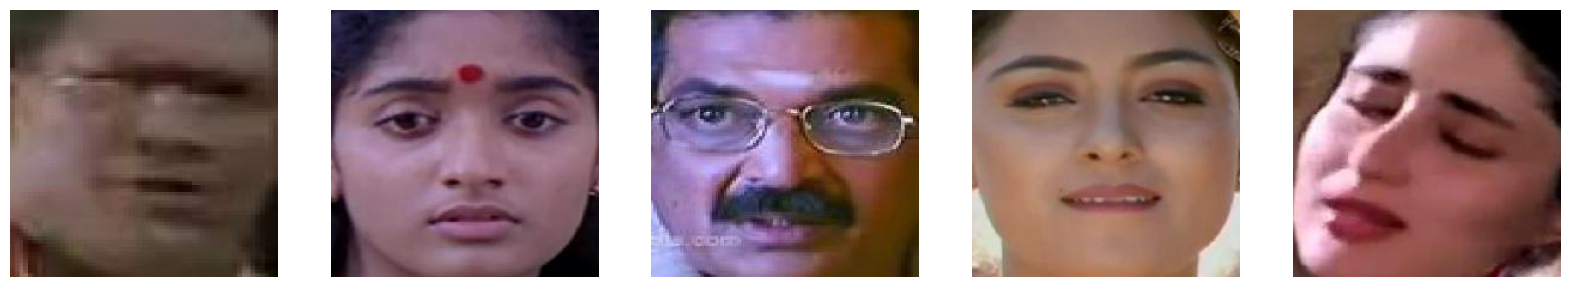

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [13]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [14]:
X.min(), X.max()

(0, 255)

In [15]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [16]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

In [17]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\tsepo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [20]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.5120 - loss: 0.7041 - val_accuracy: 0.5152 - val_loss: 0.6927
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4959 - loss: 0.6937 - val_accuracy: 0.5154 - val_loss: 0.6929
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5056 - loss: 0.6945 - val_accuracy: 0.5149 - val_loss: 0.6928
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.4921 - loss: 0.6935 - val_accuracy: 0.5152 - val_loss: 0.6928
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.4908 - loss: 0.6935 - val_accuracy: 0.5152 - val_loss: 0.6927
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.5027 - loss: 0.6933 - val_accuracy: 0.4837 - val_loss: 0.6944
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.5086 - loss: 0.6933 - val_accuracy: 0.5152 - val_loss: 0.6928
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.4978 - loss: 0.6938 - val_accuracy: 0.51

In [21]:
# Assuming model is your trained Keras Sequential model
# Assuming X_valid is your validation data

# Get the probabilities for each class
prediction_probabilities = model.predict(X_valid)

# Extract the class with the highest probability for each prediction
predictions = prediction_probabilities.argmax(axis=1)

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_valid, predictions)
mse = mean_squared_error(y_valid, predictions)
r_squared = r2_score(y_valid, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared: {r_squared:.2f}')

Mean Absolute Error (MAE): 0.52
Mean Squared Error (MSE): 0.52
R-squared: -1.06


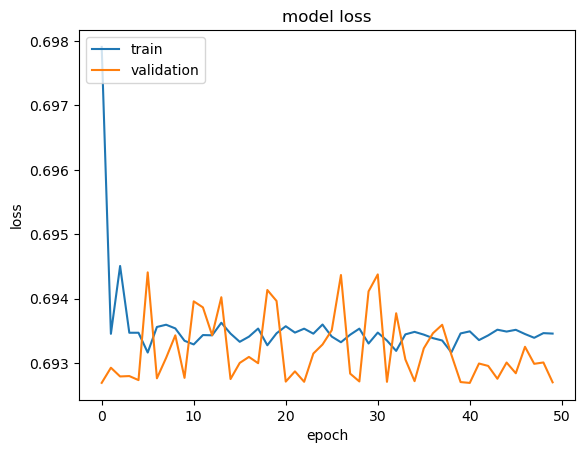

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

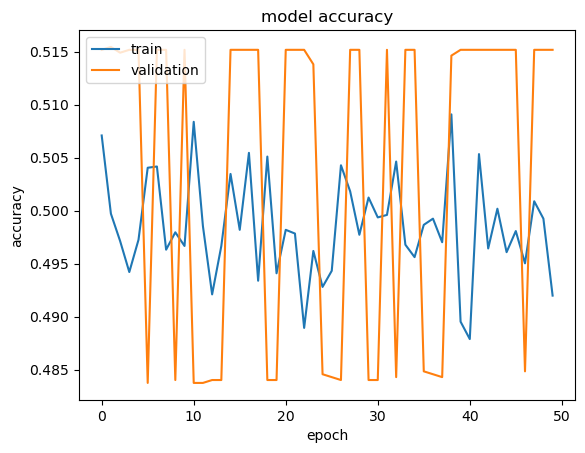

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is [51] % sure that it is female
And actual class is  0


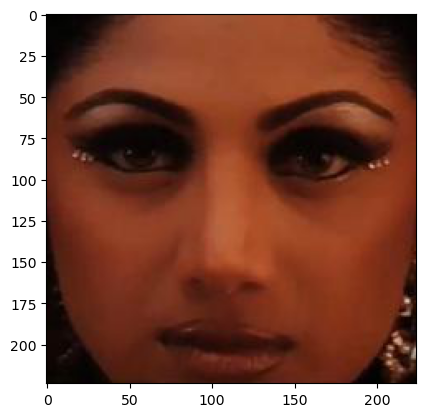

In [25]:
# pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is female')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

Model is [51] % sure that it is female
And actual class is  0


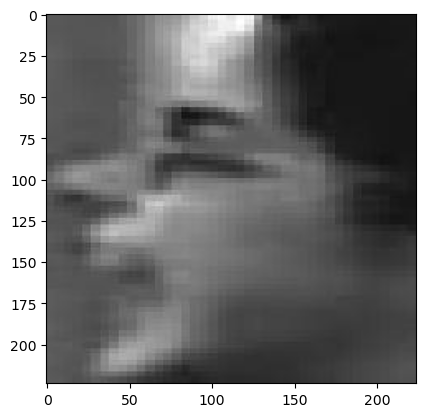

In [26]:
# pull out the original images from the data which correspond to the validation data
_, valid_Gender, _, valid_y = train_test_split(data_1.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_Gender)))

# get the corresponding image name and probability
img_name = valid_Gender[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is female')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

Changing activation function of hidden layer

In [27]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

C:\Users\tsepo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.4865 - loss: 417207.5000 - val_accuracy: 0.4843 - val_loss: 0.6932
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.4939 - loss: 0.6931 - val_accuracy: 0.4843 - val_loss: 0.6932
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.4967 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.4998 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.4976 - loss: 0.6930 - val_accuracy: 0.5157 - val_loss: 0.6931
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.4917 - loss: 0.6931 - val_accuracy:

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Obtain predictions for the validation set
predictions = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_valid, predictions)

# Calculate R-squared
r_squared = r2_score(y_valid, predictions)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared:', r_squared)

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Absolute Error (MAE): 0.4999381874258579
Mean Squared Error (MSE): 0.24994205539319456
R-squared: -0.0007567733014810507


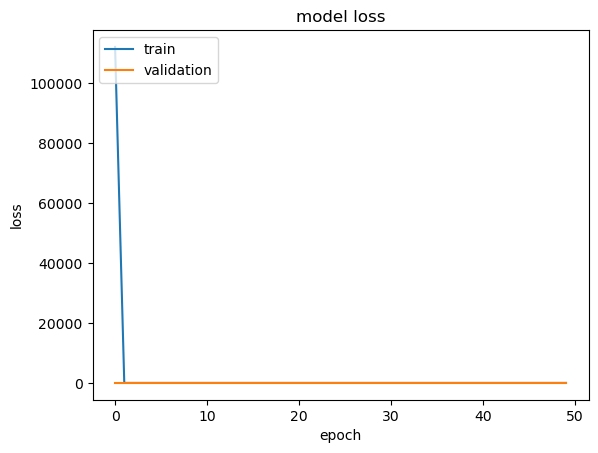

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

# Define the model
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(1024, activation='relu'),
    Dense(units=1, activation='linear')
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])


C:\Users\tsepo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │     154,141,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 707ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 720ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 48s 713ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 46s 695ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 673ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 47s 698ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 51s 762ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 52s

In [49]:
from sklearn.metrics import accuracy_score

# Convert raw predictions to binary classes based on a threshold (0.5)
predicted_classes = [1 if pred > 0.5 else 0 for pred in raw_predictions]

# Calculate accuracy
accuracy = accuracy_score(y_valid, predicted_classes)
print('Accuracy on validation set:', accuracy * 100, '%')


Accuracy on validation set: 48.42853238589779 %


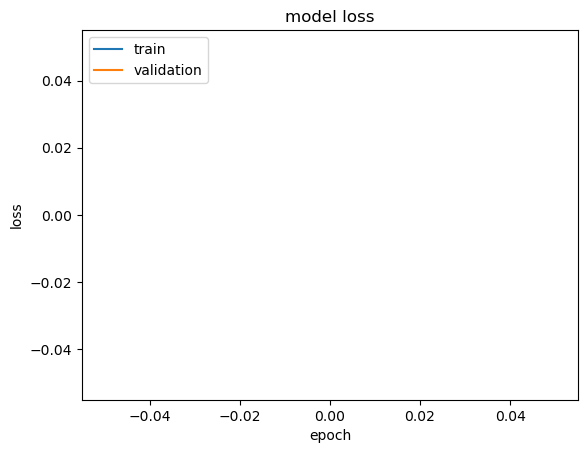

In [48]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.4988 - loss: 0.7018 - val_accuracy: 0.5179 - val_loss: 0.6925
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4947 - loss: 0.6940 - val_accuracy: 0.5160 - val_loss: 0.6926
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5019 - loss: 0.6933 - val_accuracy: 0.4843 - val_loss: 0.6948
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.4957 - loss: 0.6936 - val_accuracy: 0.5154 - val_loss: 0.6930
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.4843 - val_loss: 0.6934
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4980 - loss: 0.6933 - val_accuracy: 0.4843 - val_loss: 0.6938
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.4906 - loss: 0.6934 - val_accuracy: 0.4843 - val_loss: 0.6947
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4916 - loss: 0.6936 - val_accuracy: 0

In [56]:
from sklearn.metrics import mean_absolute_error

# Obtain predictions for the validation set
predictions = model.predict(X_valid)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, predictions)

print('Mean Absolute Error (MAE) on validation set:', mae)


115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Absolute Error (MAE) on validation set: 0.500132943354659


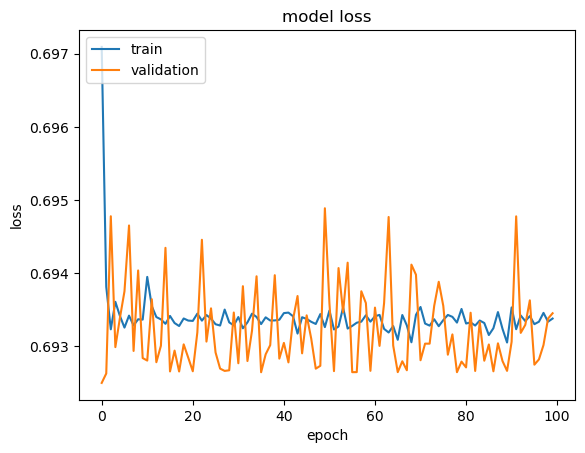

In [57]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
from keras.optimizers import Adam

In [60]:
from keras.optimizers import Adam

# Define the optimizer with the learning rate specified
adam = Adam(learning_rate=1e-5)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

In [61]:
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\tsepo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [62]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - accuracy: 0.5019 - loss: 0.6963 - val_accuracy: 0.5157 - val_loss: 0.6927
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.5026 - loss: 0.6940 - val_accuracy: 0.5157 - val_loss: 0.6926
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.5157 - val_loss: 0.6928
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.5035 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6929
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.4955 - loss: 0.6933 - val_accuracy: 0.5157 - val_loss: 0.6930
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.4987 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6928
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.5157 - val_loss: 0.6929
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5005 - loss: 0.6932 - 

In [65]:
# Obtain predictions for the validation set
predictions = model.predict(X_valid)

# Calculate accuracy (not applicable for regression)
# Replace this with appropriate regression metrics
# For example, Mean Absolute Error (MAE) or Mean Squared Error (MSE)
mae = mean_absolute_error(y_valid, predictions)
print('Mean Absolute Error (MAE) on validation set:', mae)

#print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Mean Absolute Error (MAE) on validation set: 0.49993677517533075


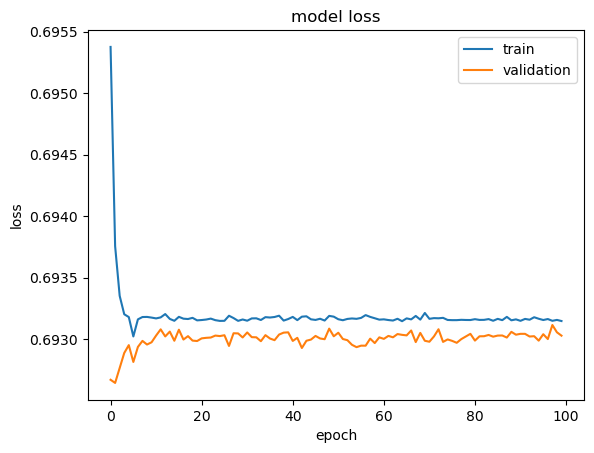

In [66]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

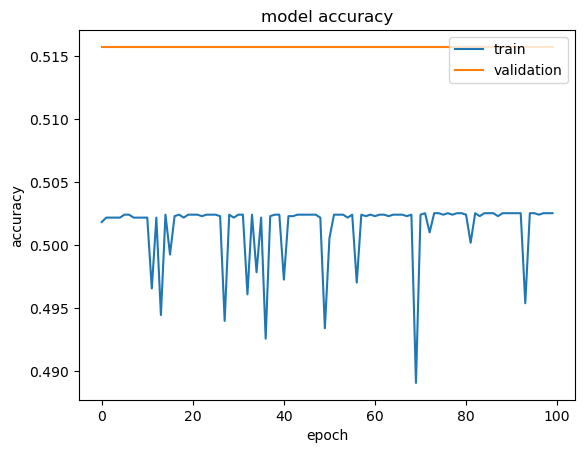

In [67]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()